# Histone modifications

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

random_seed = 123
np.random.seed(random_seed)

# 1. Reading the data

In [17]:
import pandas as pd

train = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/ML-course-VIB-2020/master/data_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/ML-course-VIB-2020/master/data_test.csv")

In [18]:
train_ids = train.pop("GeneId")
train_labels = train.pop("Label")

In [19]:
test_index_col = test.pop("GeneId")

# 2. Fitting a decision tree model

The scikit-learn `DecisionTreeClassifier` class computes a decision tree predictive model from a dataset. 

To get all the options for learning you can simply type: 

In [20]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int, default=None
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int or float, default=2
 |      The minimum 

You notice that there are many (hyper)parameters to set. These influence the complexity of the model. An important such parameter is the `max_depth` that sets a limit on how deep a decision tree can become. 

Let's create a decision tree model with `max_depth=3`:

In [21]:
cls = DecisionTreeClassifier(max_depth=3)

This creates a decision tree model with default values for the other hyperparameters:

In [22]:
cls

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Let's create a validation set, fit the model and evaluate.

In [23]:
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train,train_labels,
                                                  test_size=.2, random_state=random_seed)

cls.fit(train_X,train_y)

predictions_train = cls.predict(train_X)
predictions_val = cls.predict(val_X)

print("Accuracy: (%f) %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))

predictions_train_prob = cls.predict_proba(train_X)
predictions_val_prob = cls.predict_proba(val_X)

print("Log-loss: (%f) %f"%(log_loss(train_y,predictions_train_prob[:,-1]),log_loss(val_y,predictions_val_prob[:,-1])))

Accuracy: (0.822353) 0.818008
Log-loss: (0.456446) 0.461147


The following code plots the fitted decision tree `cls` as a `tree.png` file:

In [24]:
"""
from sklearn import tree
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(cls_DT, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png("tree.png")
"""

'\nfrom sklearn import tree\nfrom io import StringIO\nfrom IPython.display import Image, display\nimport pydotplus\n\nout = StringIO()\ntree.export_graphviz(cls_DT, out_file=out)\ngraph=pydotplus.graph_from_dot_data(out.getvalue())\ngraph.write_png("tree.png")\n'

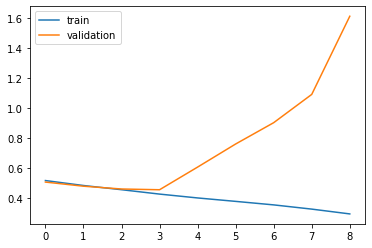

In [25]:
result = []
for md in range(1,10):
  cls = DecisionTreeClassifier(max_depth=md)
  cls.fit(train_X,train_y)
  predictions_train_prob = cls.predict_proba(train_X)
  predictions_val_prob = cls.predict_proba(val_X)
  result.append([log_loss(train_y,predictions_train_prob[:,-1]),log_loss(val_y,predictions_val_prob[:,-1])])

toplot = pd.DataFrame(result,columns=["train","validation"])
toplot.plot()


# 4. Kaggle evaluation

Let's make a Kaggle submission:

In [26]:
#code for submission
predictions_test = cls_DT.predict_proba(test)

out_tmp = pd.DataFrame()
out_tmp["GeneId"] = test_index_col
out_tmp["eyeDetection"] = predictions_test[:,1]
out_tmp.to_csv("submission_DT.csv",index=False)

NameError: ignored

How does the model perform on the testset?

# 5. Hyperparamters

For our first submission we set the hyperparameter `max_depth=3`. Other values might result in lower log-loss on the testset. 

Since we don't have the testset labels we can only check this on the public leaderboard, which we can/should not do!

So, we need to create our own testset (**not seen during training!**) with known class labels.

Scikit-learn offers many options to do this. One of them is the `train_test_split` function:

In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train_norm,train_labels,
                                                  test_size=.2, random_state=random_seed)

#train fold
print(train_X.shape)
print(train_y.shape)
#validation fold
print(val_X.shape)
print(val_y.shape)

Fit a decision tree model with `max_depth=14` default paramters on the `train_X` data set.

In [ ]:
#solution
cls_DT = DecisionTreeClassifier(max_depth=14)
cls_DT.fit(train_X,train_y)

What is the accuracy and log-loss on `train_X`? 

In [ ]:
#solution
predictions = cls_DT.predict(train_X)
print("Accuracy: %f"%(accuracy_score(predictions, train_y)))
predictions = cls_DT.predict_proba(train_X)
print("Log-loss: %f"%(log_loss(train_y,predictions[:,1])))

What is the accuracy and log-loss on `val_X`?

In [ ]:
#solution
predictions = cls_DT.predict(val_X)
print("Accuracy: %f"%(accuracy_score(predictions, val_y)))
predictions = cls_DT.predict_proba(val_X)
print("Log-loss: %f"%(log_loss(val_y,predictions[:,1])))

What do you see?


The following code evaluates different values for this hyperparameter.

In [ ]:
for maxdepth in range(1,20,1):
    cls = DecisionTreeClassifier(max_depth=maxdepth)
    cls.fit(train_X,train_y)
    predictions_train = cls.predict(train_X)
    predictions_val = cls.predict(val_X)
    predictions_train_prob = cls.predict_proba(train_X)[:,1]
    predictions_val_prob = cls.predict_proba(val_X)[:,1]
    print("%i (%f) %f (%f) %f"%(maxdepth,
                                accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y),
                                log_loss(train_y,predictions_train_prob),log_loss(val_y,predictions_val_prob)))

What do you see?

So, we have split the data into a train- and validationset. We can of course split the data in many different ways (different random seeds) resulting in different train- and validationsets.

Let's try 5 different random seeds:

In [ ]:
for run in range(5):
  train_X, val_X, train_y, val_y = train_test_split(train_norm,train_labels,
                                                  test_size=.8, random_state=run)
  min_m = 100
  best = None
  for maxdepth in range(1,20,1):
      cls = DecisionTreeClassifier(max_depth=maxdepth)
      cls.fit(train_X,train_y)
      predictions_val_prob = cls.predict_proba(val_X)[:,1]
      m = log_loss(val_y,predictions_val_prob)
      if m < min_m:
        min_m = m
        best = maxdepth
  print("%i %f"%(best,min_m))

What do you see?

The solution is to run several train-validations splits and average the performance.

One popular method is cross-validation that uses each datapoint once as a testpoint.

It works as follows:
<br/>
<br/>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png"/>
<br/>
<br/>

It is easy to run this in Scikit-learn:



In [ ]:
from sklearn.model_selection import cross_val_predict

for maxdepth in range(1,10,1):
    cls = DecisionTreeClassifier(max_depth=maxdepth)
    predictions = cross_val_predict(cls,train_norm,train_labels,
                                    cv=10,
                                    method="predict_proba")
    print("%i %f"%(maxdepth,log_loss(train_labels,predictions[:,1])))

We can do this in two lines of code with the `GridSearchCV` module:


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':range(1,10)
    }

GSCV = GridSearchCV(cls_DT, params,
                    cv=10,
                    scoring="neg_log_loss",
                    verbose=1).fit(train_norm,train_labels)

print(GSCV.best_estimator_)
print(GSCV.best_score_)

Play with the hyperparameters in a Template notebook and make some Kaggle submissions.

# 5. Ensemble learning: bagging

We have seen that bias and variance play an important role in Machine Learning. 

Let's first see what bagging can do for our dataset. 

In [ ]:
from sklearn.ensemble import BaggingClassifier

cls = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=random_seed)
                                                            
cls.fit(train_X,train_y)
predictions_train = cls.predict(train_X)
predictions_val = cls.predict(val_X)
print("Accuracy: (%f) %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))
predictions_train_prob = cls.predict_proba(train_X)
predictions_val_prob = cls.predict_proba(val_X)
print("Log-loss: (%f) %f"%(log_loss(train_y,predictions_train_prob[:,1]),log_loss(val_y,predictions_val_prob[:,1])))

With the `RandomForestClassifier` the variance of the decision tree is reduced also by selecting features for decision tree contruction at random. Let's see how far we get with default hyperparameter values.   

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier(random_state=random_seed)

cls.fit(train_X,train_y)
predictions_train = cls.predict(train_X)
predictions_val = cls.predict(val_X)
print("Accuracy: (%f) %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))
predictions_train_prob = cls.predict_proba(train_X)
predictions_val_prob = cls.predict_proba(val_X)
print("Log-loss: (%f) %f"%(log_loss(train_y,predictions_train_prob[:,1]),log_loss(val_y,predictions_val_prob[:,1])))

# 6. Ensemble learning: boosting

How about the `GradientBoostingClassifier`?

In [ ]:
#solution
from sklearn.ensemble import GradientBoostingClassifier

cls = GradientBoostingClassifier(random_state=random_seed,
                                    max_depth=10)
cls.fit(train_X,train_y)
predictions_train = cls.predict(train_X)
predictions_val = cls.predict(val_X)
print("Accuracy: (%f) %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))
predictions_train_prob = cls.predict_proba(train_X)
predictions_val_prob = cls.predict_proba(val_X)
print("Log-loss: (%f) %f"%(log_loss(train_y,predictions_train_prob[:,1]),log_loss(val_y,predictions_val_prob[:,1])))